In [11]:
# imports
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

import numpy as np
import matplotlib.pyplot as plt

In [12]:
# load data
(x_train, _), (x_test, _) = mnist.load_data()

# normalize input data between 0-1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# len(x_train) : 60000
# x_train.shape[1:] : (28, 28)
# np.prod(x_train.shape[1:]) : 28*28=784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [13]:
# create auto-encoder using fucntional API model
# auto-encoder model : encoder model --> placeholder layer --> decoder model

encoder_input = Input(shape=(784,))
encoded = Dense(64, activation='relu')(encoder_input)
encoder_model = Model(encoder_input, encoded)

decoded = Dense(784, activation='relu')(encoded)
auto_encoder_model = Model(encoder_input, decoded)

decoder_input = Input(shape=(64,))
decoder_layer = auto_encoder_model.layers[-1]
decoder_model = Model(decoder_input, decoder_layer(decoder_input))

auto_encoder_model.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])
auto_encoder_model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [21]:
# fit the model
network_history = auto_encoder_model.fit(x_train, x_train, batch_size=128, epochs=50, shuffle=True)

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 535.4218 - accuracy: 0.0135
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 535.2715 - accuracy: 0.0137
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 535.2482 - accuracy: 0.0150
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 535.2142 - accuracy: 0.0124
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 535.6558 - accuracy: 0.0146
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 535.7192 - accuracy: 0.0115
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 535.2239 - accuracy: 0.0132
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 535.2844 - accuracy: 0.0127
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 535.1796 - accuracy: 0.0127
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 535.129

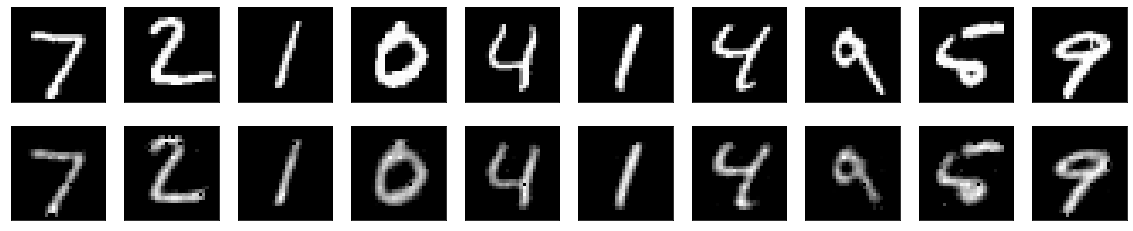

In [22]:
# test the model
encoded_imgs = encoder_model.predict(x_test)
decoded_imgs = decoder_model.predict(encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()